In [4]:
# Import statements
import os
import traceback
import pickle
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from LearningSession import *
from LearningChoicePredictor import *
from LearningPsychometricPredictor import *
import ssm

## Set up Data

In [5]:
animal = 'mSM63'
folder = '/home/chingf/engram/data/musall/learning/neural/mSM63'
dates = os.listdir(folder)
dates.sort()
dates = dates[1:]
dates.sort(key = lambda date: datetime.strptime(date, '%d-%b-%Y')) 

In [6]:
session = LearningSession(
    animal, dates[26], access_engram=True, load_Vc=False
    )

In [7]:
predictor = LearningPsychometricPredictor(session)

In [8]:
trial_choices = predictor.trial_choices
nonnan_choices = np.logical_not(np.isnan(trial_choices))
nonnan_data = np.ones((nonnan_choices.shape)).astype(bool)
for trial in range(predictor.data.shape[0]):
    if np.sum(np.isnan(predictor.data[trial,:])) > 0:
        nonnan_data[trial] = False
nonnan_indices = np.logical_and(nonnan_choices, nonnan_data)
y = trial_choices[nonnan_indices].astype(int) - 1
y = y.reshape((-1,1))
X = predictor.data[nonnan_indices,:]

In [9]:
indices = np.arange(y.size)
X_train, X_test, y_train, y_test, train_indices, test_indices = \
    train_test_split(
        X, y, indices, test_size = 0.20, stratify=y
        )

In [10]:
K = 2 # Number of states
D = 1 # Dimension of observations

## Bernoulli with SGD

In [17]:
statedim_likelihoods = []
for K in range(4):
    hmm = ssm.HMM(
        K, D, observations="bernoulli"
        )
    lls = hmm.fit(
        y_train,
        inputs=X_train,
        method="em"
        )
    statedim_likelihoods.append(max(lls))

/home/chingf/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/home/chingf/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:90: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


OverflowError: cannot convert float infinity to integer

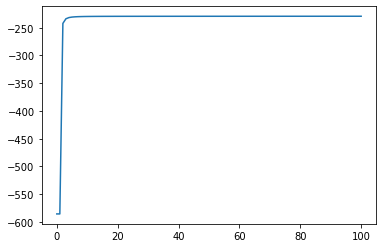

In [12]:
plt.plot(lls)

In [13]:
# Corresponding Bernoulli parameters for the classes
1/(1+np.exp(hmm.observations.logit_ps))

array([[0.87098476],
       [0.22809925]])

In [14]:
predicted = hmm.most_likely_states(y_test, input=X_test)

In [15]:
y_test.flatten()

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [16]:
predicted

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])